In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Divide the training data into features and target variable
X = train_data['text']
y = train_data['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Define models
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(max_iter=1000, C=1.0)),
    ('SupportVectorMachine', SVC(kernel='linear')),
    ('RandomForest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('MLPClassifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42))
]

best_model_name = None
best_f1 = -1.0
best_pipeline = None
best_y_pred = None
results = []

# Train and evaluate models
import time
start_time = time.time() 
for name, model in models:
    pipeline = make_pipeline(tfidf_vectorizer, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    results.append({'Model': name, 'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = name
        best_pipeline = pipeline
        best_y_pred = y_pred
end_time = time.time()  # Measure end time
duration = end_time - start_time  # Calculate duration

print(f"Training duration: {duration} seconds")       

# Display information about all models
results_df = pd.DataFrame(results)
print("Performance Metrics for Each Model:")
print(results_df)

# Save predictions of the best model to a CSV file for submission
test_text = test_data['text']
predictions = best_pipeline.predict(test_text)

submission_df = pd.DataFrame({'id': test_data['id'], 'target': predictions})
submission_df.to_csv(f'submission_{best_model_name}.csv', index=False)

# Display information about the best model
print("\nBest Model Information:")
print(f"Best Model: {best_model_name}")
print(f"Best F1 Score: {best_f1}")
print(f"Accuracy: {accuracy_score(y_val, best_y_pred)}")
print(f"Precision: {precision_score(y_val, best_y_pred)}")
print(f"Recall: {recall_score(y_val, best_y_pred)}")


Training duration: 109.15734815597534 seconds
Performance Metrics for Each Model:
                  Model  F1 Score  Accuracy  Precision    Recall
0         MultinomialNB  0.746320  0.807617   0.851779  0.664099
1    LogisticRegression  0.749384  0.799737   0.802817  0.702619
2  SupportVectorMachine  0.769861  0.815496   0.821678  0.724191
3          RandomForest  0.704933  0.783979   0.843348  0.605547
4         MLPClassifier  0.696578  0.738017   0.687688  0.705701

Best Model Information:
Best Model: SupportVectorMachine
Best F1 Score: 0.7698607698607699
Accuracy: 0.8154957321076822
Precision: 0.8216783216783217
Recall: 0.724191063174114


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Check the number of instances in each dataset
print("Training set instances:", len(train_data))
print("Testing set instances:", len(test_data))




Training set instances: 7613
Testing set instances: 3263


In [11]:
train_data = pd.read_csv('train.csv')

# Display the first few rows of the training dataset
print(train_data.head())

# Display column names (excluding the target variable, if present)
target_variable = 'target_column_name'  # Replace 'target_column_name' with your actual target column name
inputs_columns = [col for col in train_data.columns if col != target_variable]
print("Columns representing input features:")
print(inputs_columns)


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
Columns representing input features:
['id', 'keyword', 'location', 'text', 'target']


In [4]:
from sklearn.metrics import mean_squared_error

# Assuming 'y_true' is the true target values and 'y_pred' is the predictions
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")


NameError: name 'y_true' is not defined

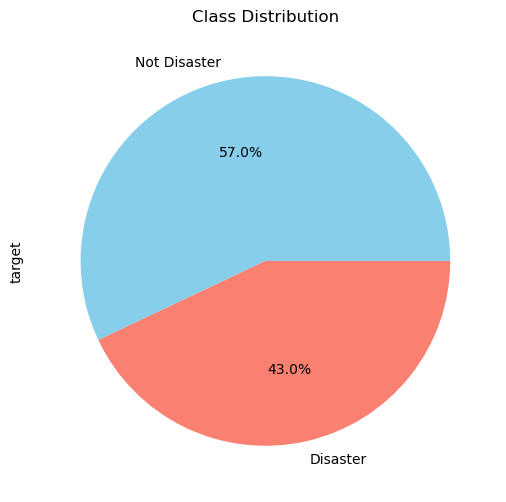

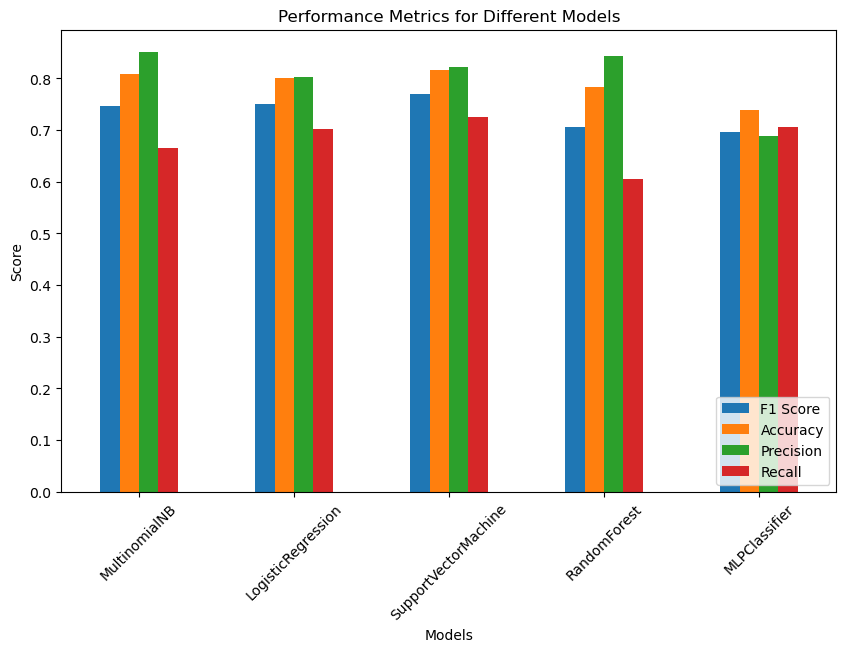

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Visualize class distribution in the training set using a pie chart
# Note: 'train_data' should be defined and loaded with appropriate data
plt.figure(figsize=(6, 6))
train_data['target'].value_counts().plot(kind='pie', labels=['Not Disaster', 'Disaster'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.show()

# Your data
data = {
    'Model': ['MultinomialNB', 'LogisticRegression', 'SupportVectorMachine', 'RandomForest', 'MLPClassifier'],
    'F1 Score': [0.746320, 0.749384, 0.769861, 0.704933, 0.696578],
    'Accuracy': [0.807617, 0.799737, 0.815496, 0.783979, 0.738017],
    'Precision': [0.851779, 0.802817, 0.821678, 0.843348, 0.687688],
    'Recall': [0.664099, 0.702619, 0.724191, 0.605547, 0.705701]
}

# Create a DataFrame from the data
results_df = pd.DataFrame(data)

# Set the 'Model' column as the index for plotting
results_df.set_index('Model', inplace=True)

# Plotting the metrics for each model
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics for Different Models')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()


